In [122]:
import datetime

# our data is going to be array of time slices with an array of bins inside
bin_step = 100 # 10 milliseconds
max_bin = 30000
bin_limits = [x for x in range(bin_step, max_bin, bin_step)]
template_bin = [0 for x in range(int(max_bin/bin_step))]

# lets make our time steps every 5 seconds - our oldest timestamp is 2021-08-13 00:30:42.298 and 10 minutes of samples
# 2021-08-13 00:39:59.997
time_offset = (datetime.datetime.fromisoformat("2021-08-12 16:38:57.526")- datetime.datetime(1970, 1, 1)).total_seconds()
time_interval = 120 #seconds
time_frame = 720 # minutes
rows = [ template_bin[:] for _ in range(0,int(time_frame*60/time_interval)) ] # build an empty array

len(rows)
rows[10]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [123]:
# ok now we need to read the csv file, for each row of the csv file work out which time row it should go into and which bin (column)

import csv
csv_file = open('logs-insights-results-3.csv', 'r')
reader = csv.reader(csv_file)
next(reader, None) # ignore header row
for row in reader:
    print(row)
    seconds = (datetime.datetime.fromisoformat(row[0])- datetime.datetime(1970, 1, 1)).total_seconds()
    seconds = time_offset - seconds
    hours = int(hours)
    seconds = seconds + minutes*60 + hours*60*60
    duration = int(float(row[1]))
    time_bucket = int(seconds/time_interval)
    duration_bucket = int((duration / bin_step))
    print((time_bucket, duration_bucket))
    if duration_bucket > int(max_bin/bin_step):
        duration_bucket = int(max_bin/bin_step)
    rows[time_bucket][duration_bucket-1] += 1 #increment the counter for the bin in the time slice

['2021-08-13 02:01:08.726', '28764.48']
(-220, 287)
['2021-08-12 20:54:13.944', '27805.91']
(-67, 278)
['2021-08-13 01:37:10.452', '25703.39']
(-208, 257)
['2021-08-13 01:37:10.570', '25672.5']
(-208, 256)
['2021-08-13 01:30:23.657', '25428.8']
(-205, 254)
['2021-08-13 01:38:22.200', '25282.02']
(-209, 252)
['2021-08-13 01:51:27.843', '24894.05']
(-215, 248)
['2021-08-13 01:30:21.756', '24767.61']
(-205, 247)
['2021-08-13 01:48:39.643', '24764.21']
(-214, 247)
['2021-08-13 01:20:27.665', '24555.67']
(-200, 245)
['2021-08-13 01:29:27.358', '24267.61']
(-204, 242)
['2021-08-13 01:51:27.015', '24176.26']
(-215, 241)
['2021-08-13 01:24:38.918', '24065.03']
(-202, 240)
['2021-08-13 01:53:50.994', '24009.15']
(-216, 240)
['2021-08-13 02:25:32.705', '23887.48']
(-232, 238)
['2021-08-13 02:25:32.972', '23851.04']
(-232, 238)
['2021-08-13 01:48:39.861', '23821.19']
(-214, 238)
['2021-08-13 02:02:44.504', '23640.24']
(-221, 236)
['2021-08-13 01:58:03.618', '23537.68']
(-219, 235)
['2021-08-13 01

(58, 97)
['2021-08-12 18:17:57.835', '9724.64']
(10, 97)
['2021-08-12 21:24:25.201', '9722']
(-82, 97)
['2021-08-12 18:07:31.298', '9719.23']
(16, 97)
['2021-08-13 03:48:46.401', '9718.02']
(-274, 97)
['2021-08-12 20:25:54.294', '9711.89']
(-52, 97)
['2021-08-12 21:16:33.297', '9705.66']
(-78, 97)
['2021-08-12 18:10:50.688', '9704.61']
(14, 97)
['2021-08-12 23:12:17.283', '9700.48']
(-136, 97)
['2021-08-13 03:47:45.324', '9699.34']
(-273, 96)
['2021-08-12 17:44:19.257', '9698.56']
(27, 96)
['2021-08-12 22:27:29.394', '9695.73']
(-113, 96)
['2021-08-12 22:03:47.241', '9690.18']
(-101, 96)
['2021-08-12 17:58:36.502', '9684.66']
(20, 96)
['2021-08-12 17:39:36.676', '9683.39']
(30, 96)
['2021-08-13 00:49:43.045', '9680.88']
(-184, 96)
['2021-08-12 17:22:57.602', '9680.64']
(38, 96)
['2021-08-13 01:54:30.721', '9680.46']
(-217, 96)
['2021-08-12 22:30:33.575', '9677.37']
(-115, 96)
['2021-08-13 00:18:42.636', '9676.42']
(-169, 96)
['2021-08-12 18:18:58.758', '9676.19']
(10, 96)
['2021-08-13 

(-229, 83)
['2021-08-13 04:36:31.495', '8318.33']
(-298, 83)
['2021-08-12 19:14:50.909', '8301.57']
(-17, 83)
['2021-08-12 19:58:50.021', '8297.24']
(-39, 82)
['2021-08-12 20:45:13.923', '8297.2']
(-62, 82)
['2021-08-13 00:13:05.322', '8294.95']
(-166, 82)
['2021-08-12 20:12:57.204', '8293.45']
(-46, 82)
['2021-08-12 19:37:38.623', '8290.65']
(-28, 82)
['2021-08-13 00:07:29.071', '8287.29']
(-163, 82)
['2021-08-12 19:34:37.122', '8286.93']
(-27, 82)
['2021-08-12 20:26:04.474', '8285.4']
(-53, 82)
['2021-08-12 20:06:53.993', '8272.4']
(-43, 82)
['2021-08-12 21:05:22.075', '8245.21']
(-72, 82)
['2021-08-12 19:36:37.960', '8245.14']
(-28, 82)
['2021-08-12 18:37:23.779', '8245.12']
(1, 82)
['2021-08-12 20:40:11.701', '8238.78']
(-60, 82)
['2021-08-12 20:19:00.922', '8234.71']
(-49, 82)
['2021-08-13 03:03:06.547', '8224.77']
(-251, 82)
['2021-08-12 20:30:07.177', '8221.12']
(-55, 82)
['2021-08-13 03:51:08.862', '8215.58']
(-275, 82)
['2021-08-12 20:46:14.253', '8210.88']
(-63, 82)
['2021-08

['2021-08-12 23:45:50.233', '5347.81']
(-152, 53)
['2021-08-13 04:32:48.796', '5340.29']
(-296, 53)
['2021-08-12 23:56:08.137', '5337.81']
(-158, 53)
['2021-08-12 23:40:20.169', '5337.77']
(-150, 53)
['2021-08-12 23:48:08.258', '5333.76']
(-154, 53)
['2021-08-12 20:32:29.618', '5329.61']
(-56, 53)
['2021-08-13 02:17:11.728', '5327.63']
(-228, 53)
['2021-08-13 04:17:20.269', '5324.55']
(-288, 53)
['2021-08-13 02:18:12.683', '5319.38']
(-229, 53)
['2021-08-13 00:56:57.693', '5312.35']
(-188, 53)
['2021-08-12 18:51:09.401', '5298.99']
(-5, 52)
['2021-08-12 21:23:32.099', '5292.4']
(-81, 52)
['2021-08-13 04:30:47.039', '5289.55']
(-295, 52)
['2021-08-13 00:58:27.980', '5287.53']
(-189, 52)
['2021-08-12 23:50:55.275', '5287.37']
(-155, 52)
['2021-08-12 23:47:26.174', '5284.6']
(-153, 52)
['2021-08-12 19:01:08.123', '5281.37']
(-10, 52)
['2021-08-12 23:43:07.377', '5270.53']
(-151, 52)
['2021-08-12 18:58:11.440', '5268.26']
(-9, 52)
['2021-08-13 01:33:29.881', '5253.59']
(-206, 52)
['2021-08

['2021-08-12 23:52:07.999', '4255.8']
(-156, 42)
['2021-08-12 22:37:54.086', '4255.59']
(-118, 42)
['2021-08-12 23:19:01.779', '4254.99']
(-139, 42)
['2021-08-13 03:52:55.047', '4254.41']
(-276, 42)
['2021-08-13 04:09:58.612', '4254.31']
(-285, 42)
['2021-08-12 18:04:08.666', '4254.2']
(17, 42)
['2021-08-12 20:43:31.193', '4253.41']
(-61, 42)
['2021-08-12 21:23:39.340', '4252.43']
(-81, 42)
['2021-08-12 18:36:05.432', '4252.39']
(1, 42)
['2021-08-13 02:35:39.909', '4252.2']
(-237, 42)
['2021-08-13 00:11:12.118', '4251.79']
(-165, 42)
['2021-08-13 02:19:36.868', '4251.57']
(-229, 42)
['2021-08-12 22:49:56.252', '4250.98']
(-124, 42)
['2021-08-13 03:54:55.547', '4250.86']
(-277, 42)
['2021-08-13 03:15:47.761', '4250.65']
(-257, 42)
['2021-08-12 19:11:55.322', '4250.51']
(-15, 42)
['2021-08-13 01:00:21.926', '4250.14']
(-190, 42)
['2021-08-12 21:03:35.153', '4250.12']
(-71, 42)
['2021-08-13 02:44:41.507', '4249.25']
(-242, 42)
['2021-08-12 18:51:08.161', '4248.97']
(-5, 42)
['2021-08-12 1

(13, 38)
['2021-08-12 20:58:36.111', '3820.84']
(-69, 38)
['2021-08-13 01:41:57.166', '3818.5']
(-210, 38)
['2021-08-12 18:32:53.593', '3817.32']
(3, 38)
['2021-08-12 17:25:32.821', '3816.6']
(37, 38)
['2021-08-12 19:52:14.189', '3816.53']
(-36, 38)
['2021-08-12 18:24:24.726', '3816.07']
(7, 38)
['2021-08-13 01:26:35.694', '3815.63']
(-203, 38)
['2021-08-12 19:09:22.165', '3815.46']
(-14, 38)
['2021-08-12 18:55:05.338', '3815.43']
(-7, 38)
['2021-08-13 04:20:55.630', '3815.22']
(-290, 38)
['2021-08-12 18:40:01.181', '3814.59']
(0, 38)
['2021-08-12 23:30:54.368', '3814.13']
(-145, 38)
['2021-08-13 00:38:26.625', '3814.06']
(-179, 38)
['2021-08-13 00:34:20.738', '3813.34']
(-177, 38)
['2021-08-12 23:20:41.502', '3813.03']
(-140, 38)
['2021-08-12 19:03:14.860', '3812.61']
(-11, 38)
['2021-08-12 22:42:51.509', '3811.72']
(-121, 38)
['2021-08-13 00:35:22.019', '3811.48']
(-177, 38)
['2021-08-12 18:26:00.559', '3811.47']
(6, 38)
['2021-08-13 00:32:17.329', '3809.37']
(-176, 38)
['2021-08-13 

(55, 26)
['2021-08-12 16:48:35.860', '2642.22']
(55, 26)
['2021-08-12 21:20:16.458', '2640.42']
(-80, 26)
['2021-08-12 19:04:27.241', '2639.5']
(-12, 26)
['2021-08-12 21:14:54.789', '2639.24']
(-77, 26)
['2021-08-13 01:02:05.468', '2637.76']
(-191, 26)
['2021-08-12 23:23:29.621', '2635.9']
(-141, 26)
['2021-08-12 16:42:42.215', '2634.77']
(58, 26)
['2021-08-12 21:17:54.729', '2634.56']
(-78, 26)
['2021-08-12 21:14:17.015', '2633.72']
(-77, 26)
['2021-08-12 17:56:53.560', '2632.73']
(21, 26)
['2021-08-13 00:12:05.455', '2632.6']
(-166, 26)
['2021-08-12 21:10:13.998', '2632.34']
(-75, 26)
['2021-08-13 02:45:41.507', '2625.85']
(-242, 26)
['2021-08-12 17:54:48.536', '2624.62']
(22, 26)
['2021-08-12 17:34:35.493', '2622.23']
(32, 26)
['2021-08-12 17:48:05.681', '2618.48']
(25, 26)
['2021-08-13 03:41:29.839', '2618.23']
(-270, 26)
['2021-08-12 17:57:00.255', '2617.02']
(21, 26)
['2021-08-12 23:23:37.042', '2614.79']
(-141, 26)
['2021-08-12 21:53:32.152', '2613.6']
(-96, 26)
['2021-08-12 17:

['2021-08-12 22:06:27.083', '1398.96']
(-103, 13)
['2021-08-12 22:05:17.887', '1395.25']
(-102, 13)
['2021-08-13 04:18:13.171', '1394.94']
(-289, 13)
['2021-08-13 03:59:53.449', '1394.35']
(-279, 13)
['2021-08-13 04:13:04.371', '1392.76']
(-286, 13)
['2021-08-12 22:07:37.265', '1392.75']
(-103, 13)
['2021-08-12 22:03:36.532', '1391.72']
(-101, 13)
['2021-08-12 23:03:40.141', '1388.33']
(-131, 13)
['2021-08-12 23:44:24.081', '1388.18']
(-152, 13)
['2021-08-12 16:52:52.280', '1387.47']
(53, 13)
['2021-08-12 22:04:08.736', '1386.58']
(-102, 13)
['2021-08-12 22:03:32.472', '1385.65']
(-101, 13)
['2021-08-12 23:04:40.297', '1383.88']
(-132, 13)
['2021-08-12 23:00:58.638', '1382.11']
(-130, 13)
['2021-08-12 16:44:40.621', '1382.02']
(57, 13)
['2021-08-12 23:03:04.296', '1376.42']
(-131, 13)
['2021-08-13 04:09:56.101', '1375.9']
(-284, 13)
['2021-08-13 04:16:10.213', '1371.38']
(-288, 13)
['2021-08-13 04:10:22.292', '1371.34']
(-285, 13)
['2021-08-12 16:46:04.198', '1371.33']
(56, 13)
['2021-

(-184, 2)
['2021-08-12 18:21:24.896', '270.96']
(9, 2)
['2021-08-13 02:08:01.300', '270.76']
(-224, 2)
['2021-08-13 01:06:19.071', '270.71']
(-193, 2)
['2021-08-12 23:34:09.973', '270.67']
(-147, 2)
['2021-08-13 01:42:30.547', '270.63']
(-211, 2)
['2021-08-13 01:16:22.382', '270.56']
(-198, 2)
['2021-08-13 00:06:59.669', '270.49']
(-163, 2)
['2021-08-12 18:27:34.060', '270.36']
(6, 2)
['2021-08-12 20:58:11.520', '270.3']
(-69, 2)
['2021-08-12 20:46:06.655', '270.28']
(-63, 2)
['2021-08-13 00:51:42.890', '270.28']
(-185, 2)
['2021-08-13 00:17:02.905', '270.11']
(-168, 2)
['2021-08-12 17:16:26.355', '270.09']
(41, 2)
['2021-08-12 16:45:03.898', '270.05']
(57, 2)
['2021-08-12 19:45:15.921', '269.88']
(-32, 2)
['2021-08-13 00:40:22.342', '269.88']
(-180, 2)
['2021-08-13 00:19:36.622', '269.88']
(-169, 2)
['2021-08-12 22:05:02.773', '269.85']
(-102, 2)
['2021-08-12 18:43:01.578', '269.83']
(-1, 2)
['2021-08-12 19:41:17.224', '269.8']
(-30, 2)
['2021-08-12 20:03:31.802', '269.77']
(-41, 2)
[

(8, 2)
['2021-08-12 20:19:54.972', '260.05']
(-49, 2)
['2021-08-12 16:39:36.447', '260.05']
(60, 2)
['2021-08-12 21:23:55.895', '260.04']
(-81, 2)
['2021-08-13 01:31:27.069', '260.04']
(-205, 2)
['2021-08-12 16:40:21.990', '260.04']
(59, 2)
['2021-08-12 20:50:06.081', '260.03']
(-65, 2)
['2021-08-12 16:59:42.884', '260.02']
(50, 2)
['2021-08-12 17:09:08.386', '260.02']
(45, 2)
['2021-08-13 03:11:00.877', '260.02']
(-255, 2)
['2021-08-13 00:33:28.851', '260.01']
(-176, 2)
['2021-08-13 02:13:42.182', '260.01']
(-226, 2)
['2021-08-13 03:14:18.677', '259.99']
(-257, 2)
['2021-08-12 22:14:40.793', '259.99']
(-107, 2)
['2021-08-12 16:46:55.716', '259.99']
(56, 2)
['2021-08-13 03:07:50.042', '259.98']
(-253, 2)
['2021-08-12 22:33:48.106', '259.97']
(-116, 2)
['2021-08-12 19:36:41.623', '259.97']
(-28, 2)
['2021-08-12 21:58:34.166', '259.95']
(-99, 2)
['2021-08-13 03:03:55.187', '259.94']
(-251, 2)
['2021-08-13 01:33:26.779', '259.94']
(-206, 2)
['2021-08-12 20:20:43.024', '259.93']
(-50, 2)
[

(43, 2)
['2021-08-13 01:04:18.392', '254.06']
(-192, 2)
['2021-08-12 17:21:35.973', '254.06']
(39, 2)
['2021-08-12 20:09:07.561', '254.05']
(-44, 2)
['2021-08-12 19:38:42.038', '254.03']
(-29, 2)
['2021-08-12 18:31:13.557', '254.03']
(4, 2)
['2021-08-12 22:59:56.972', '254.02']
(-129, 2)
['2021-08-12 18:00:16.002', '254.01']
(19, 2)
['2021-08-12 18:36:08.393', '254.01']
(1, 2)
['2021-08-13 01:32:26.456', '253.99']
(-206, 2)
['2021-08-12 19:00:15.281', '253.98']
(-10, 2)
['2021-08-13 04:12:23.891', '253.97']
(-286, 2)
['2021-08-12 23:56:56.678', '253.97']
(-158, 2)
['2021-08-13 00:11:36.233', '253.97']
(-165, 2)
['2021-08-12 19:23:13.045', '253.96']
(-21, 2)
['2021-08-12 23:07:54.698', '253.95']
(-133, 2)
['2021-08-13 03:47:58.596', '253.95']
(-274, 2)
['2021-08-12 22:31:47.105', '253.93']
(-115, 2)
['2021-08-12 21:36:25.738', '253.93']
(-88, 2)
['2021-08-12 21:20:19.857', '253.92']
(-80, 2)
['2021-08-12 21:47:26.532', '253.91']
(-93, 2)
['2021-08-12 19:44:44.191', '253.91']
(-32, 2)
['

(50, 2)
['2021-08-12 20:21:02.804', '248.22']
(-50, 2)
['2021-08-12 18:17:09.212', '248.2']
(11, 2)
['2021-08-12 19:34:15.284', '248.2']
(-27, 2)
['2021-08-13 03:07:06.128', '248.19']
(-253, 2)
['2021-08-12 20:30:18.514', '248.19']
(-55, 2)
['2021-08-13 01:26:23.470', '248.15']
(-203, 2)
['2021-08-12 16:56:14.970', '248.13']
(51, 2)
['2021-08-12 20:46:24.581', '248.11']
(-63, 2)
['2021-08-13 04:15:24.776', '248.11']
(-287, 2)
['2021-08-13 01:33:27.421', '248.11']
(-206, 2)
['2021-08-13 02:24:29.883', '248.1']
(-232, 2)
['2021-08-12 18:13:07.598', '248.1']
(13, 2)
['2021-08-12 23:12:02.723', '248.09']
(-136, 2)
['2021-08-12 18:09:11.733', '248.09']
(15, 2)
['2021-08-12 22:11:04.091', '248.08']
(-105, 2)
['2021-08-12 19:17:32.629', '248.08']
(-18, 2)
['2021-08-12 16:50:48.537', '248.07']
(54, 2)
['2021-08-13 04:08:17.539', '248.07']
(-284, 2)
['2021-08-12 20:12:54.473', '248.06']
(-46, 2)
['2021-08-12 20:15:47.362', '248.05']
(-47, 2)
['2021-08-12 18:22:26.998', '248.04']
(8, 2)
['2021-0

(-199, 2)
['2021-08-12 17:36:01.509', '240.86']
(31, 2)
['2021-08-12 19:45:32.244', '240.85']
(-32, 2)
['2021-08-12 18:47:08.572', '240.85']
(-3, 2)
['2021-08-13 04:22:32.691', '240.82']
(-291, 2)
['2021-08-12 23:07:34.103', '240.79']
(-133, 2)
['2021-08-12 19:55:47.728', '240.79']
(-37, 2)
['2021-08-12 21:07:14.333', '240.78']
(-73, 2)
['2021-08-12 19:20:54.365', '240.78']
(-20, 2)
['2021-08-13 04:24:37.713', '240.77']
(-292, 2)
['2021-08-13 01:49:40.221', '240.77']
(-214, 2)
['2021-08-12 19:40:55.257', '240.77']
(-30, 2)
['2021-08-12 20:27:45.058', '240.74']
(-53, 2)
['2021-08-13 01:09:59.846', '240.74']
(-195, 2)
['2021-08-13 02:20:44.750', '240.72']
(-230, 2)
['2021-08-13 03:40:10.450', '240.72']
(-270, 2)
['2021-08-13 03:10:24.079', '240.72']
(-255, 2)
['2021-08-12 19:44:51.683', '240.68']
(-32, 2)
['2021-08-12 20:28:31.168', '240.65']
(-54, 2)
['2021-08-12 19:34:40.579', '240.64']
(-27, 2)
['2021-08-13 02:43:03.139', '240.64']
(-241, 2)
['2021-08-13 03:33:39.262', '240.63']
(-266

In [124]:
rows[110]

[0,
 4,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


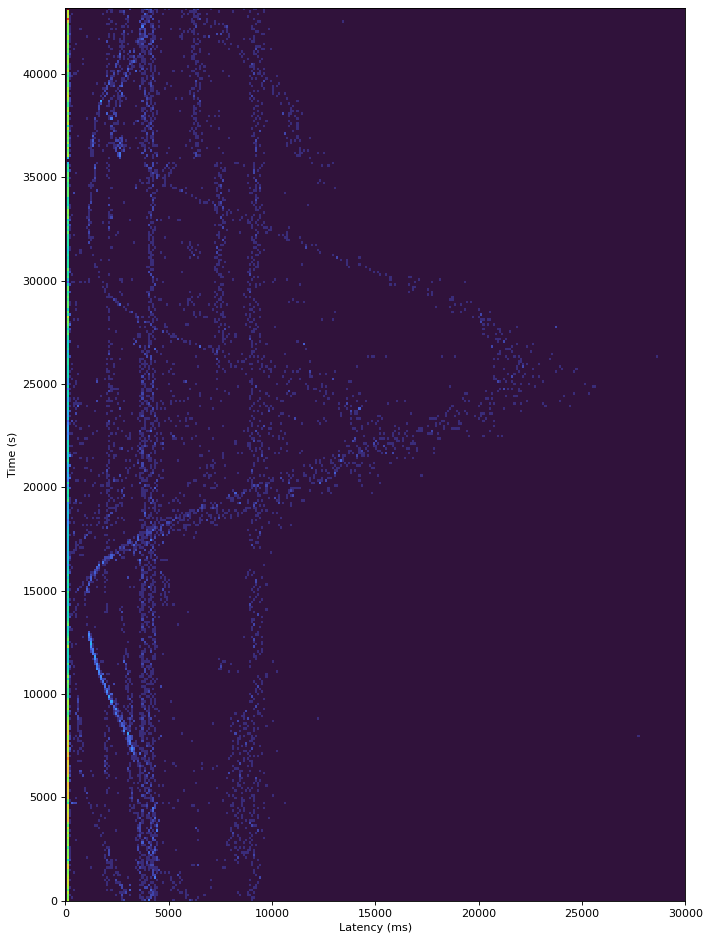

In [125]:
plot = None
import matplotlib.pyplot as plot
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

import numpy as np

#plot.plot(rows)
plot.figure(figsize=(10, 30), dpi=80)

plot.xlabel('Latency (ms)')

plot.ylabel('Time (s)')



data = np.array(rows)
#norm = LogNorm(data.mean() + 0.5 * data.std(), data.max(), clip='False')
plot.imshow(data, cmap='turbo', interpolation='nearest',extent=[0,max_bin,0,time_frame*60])
 

In [88]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 7, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0]])